<a href="https://colab.research.google.com/github/andrew6072/mephi-numerical-methods/blob/main/simple_iteration_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


$$
u(x,y) = 5(-3x+4y)cos(5x+2y)+3y^2\\
0 \leq x \leq \sqrt2,\\
0 \leq y \leq 1\\
$$

$$
u_{xx} = 150sin(5x+2y)+(375x-500y)cos(5x+2y)\\
u_{yy} = -80sin(5x+2y)+(60x-80y)cos(5x+2y)+6\\
f(x,y) = u_{xx} + u_{yy} = 70sin(5x+2y)+(435x-580y)cos(5x+2y)+6\\
$$

_Boundaries:_

$$
\begin{cases}
u(0, y) = \phi_1(y)= 20y cos(2y)+3y^2
\\
u(\sqrt2, y) = \phi_2(y) = (-15\sqrt2+20y)cos(5\sqrt2+2y)+3y^2
\\
u(x, 0) = \psi_1(x) = -15xcos(5x)
\\
u(x, 1) = \psi_2(x) = (-15x+20)cos(5x+2)+3
\end{cases}
$$


In [28]:
import numpy as np

xmin = 0
xmax = 1
ymin = 0
ymax = 1
h = 0.1
tau = h**2 / 4


def f(x, y):
    return 70 * np.sin(5 * x + 2 * y) + (435 * x - 580 * y) * np.cos(5 * x + 2 * y) + 6


def phi1(y):
    return 5 * (-3 * xmin + 4 * y) * np.cos(5 * xmin + 2 * y) + 3 * y ** 2


def phi2(y):
    return 5 * (-3 * xmax + 4 * y) * np.cos(5 * xmax + 2 * y) + 3 * y ** 2


def psi1(x):
    return 5 * (-3 * x + 4 * ymin) * np.cos(5 * x + 2 * ymin) + 3 * ymin ** 2


def psi2(x):
    return 5 * (-3 * x + 4 * ymax) * np.cos(5 * x + 2 * ymax) + 3 * ymax ** 2


def solution(x, y):
    return 5*(-2*x+3*y)*np.cos(3*x+2*y)+3*y**2


x = np.arange(xmin, xmax + h, h)
y = np.arange(ymin, ymax + h, h)

X, Y = np.meshgrid(x, y)

analytical_solution = np.zeros((len(y), len(x)))
for i, y_ in enumerate(y):
    for j, x_ in enumerate(x):
        analytical_solution[i][j] = solution(x_, y_)


def simple_iteration(x, y, h, tau, num_iteration):
    sol = f(X, Y)
    sol[0, :] = psi1(x)
    sol[len(y) - 1, :] = psi2(x)
    sol[:, 0] = phi1(y)
    sol[:, len(x) - 1] = phi2(y)
    new_sol = np.copy(sol)
    for _ in range(num_iteration):
        new_sol[1:-1, 1:-1] = sol[1:-1, 1:-1] + tau * ((sol[2:, 1:-1] - 2 * sol[1:-1, 1:-1] + sol[0:-2, 1:-1]) / h**2 +
                                                       (sol[1:-1, 2:] - 2 * sol[1:-1, 1:-1] + sol[1:-1, 0:-2]) / h**2 -
                                                       f(X[1:-1, 1:-1], Y[1:-1, 1:-1]))
        sol = np.copy(new_sol)
    return sol

In [29]:
print(X.shape)
print(x.shape)
print(Y.shape)
print(y.shape)
print(X)
print(Y)

(11, 11)
(11,)
(11, 11)
(11,)
[[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]]
[[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]
 [0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3]
 [0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4]
 [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
 [0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6]
 [0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7]
 [0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8]
 [0.9 0.9 0.9 0.9 0.9 0.9 0.9

In [30]:
num_iteration = 10

numerical_solution = simple_iteration(x, y, h, tau, num_iteration)
print(f"E = {np.linalg.norm(analytical_solution - numerical_solution):.2e}")

E = 3.48e+02


In [31]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator

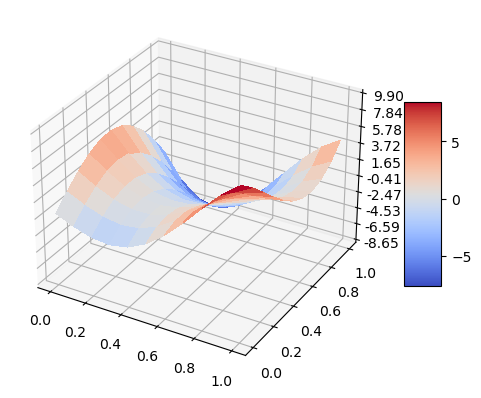

In [32]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, analytical_solution, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter('{x:.02f}')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

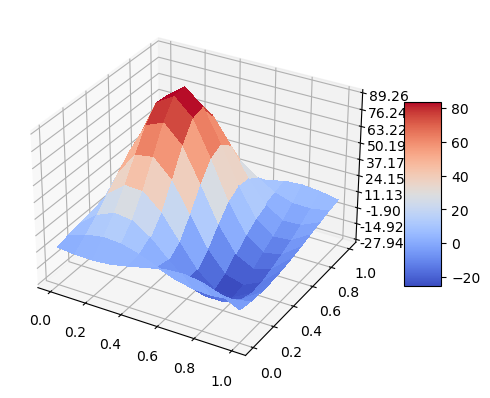

In [33]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, numerical_solution, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter('{x:.02f}')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [34]:
print(np.linalg.norm(analytical_solution[0, :] - numerical_solution[0, :]))
print(np.linalg.norm(analytical_solution[len(
    y)-1, :] - numerical_solution[len(y)-1, :]))
print(np.linalg.norm(analytical_solution[:, 0] - numerical_solution[:, 0]))
print(np.linalg.norm(analytical_solution[:, len(
    x)-1] - numerical_solution[:, len(x)-1]))

19.680917976277836
22.369724909345912
3.6484674254857
29.96423445278752


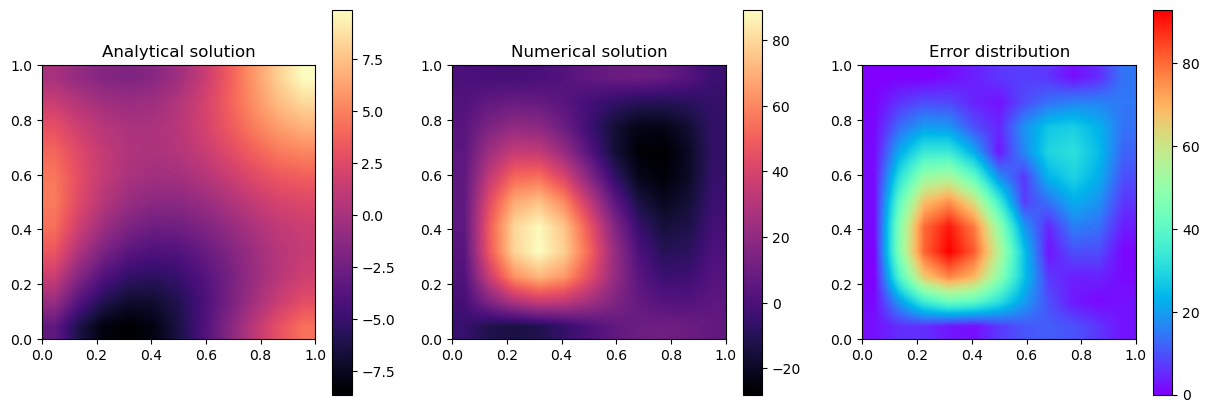

Error after 1e+01 iterations: 3.48e+02


In [35]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot the first graph in the first subplot
# axes[0].imshow(analytical_solution, extent=[xmin, xmax, ymin, ymax], cmap='magma', interpolation='bilinear')
axes[0].set_title("Analytical solution")

# Plot the second graph in the second subplot
# axes[1].imshow(numerical_solution, extent=[xmin, xmax, ymin, ymax], cmap='magma', interpolation='bilinear')
axes[1].set_title("Numerical solution")
axes[2].set_title("Error distribution")
cbar0 = fig.colorbar(axes[0].imshow(analytical_solution, extent=[
                     xmin, xmax, ymin, ymax], cmap='magma', interpolation='bilinear'), ax=axes[0])
cbar1 = fig.colorbar(axes[1].imshow(numerical_solution, extent=[
                     xmin, xmax, ymin, ymax], cmap='magma', interpolation='bilinear'), ax=axes[1])
cbar1 = fig.colorbar(axes[2].imshow(np.abs(numerical_solution-analytical_solution), extent=[
                     xmin, xmax, ymin, ymax], cmap='rainbow', interpolation='bilinear'), ax=axes[2])
plt.show()

print(f"Error after {num_iteration:.0e} iterations: {np.linalg.norm(analytical_solution - numerical_solution):.2e}")